<a href="https://colab.research.google.com/github/damitkumar11/Vehicle-Manufacturing-Dataset/blob/main/Vehicle_Manufacturing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
he dataset provides a synthetic representation of car data, encompassing various attributes such as car brand, model, manufacturing year, color, mileage, price, and location. Each row represents a unique car, identified by the Car ID. The dataset includes information about popular car brands such as Toyota, Honda, Ford, Chevrolet, and Hyundai, along with their respective models.

Additional columns capture key details, including the manufacturing year, color, mileage, price, and location of each car. These details offer insights into the variety of cars available in different regions. The dataset comprises a mix of sedans, SUVs, and hatchbacks, showcasing a range of options for potential buyers.

It is important to note that this is a synthetic dataset, created for demonstration purposes only. The values provided for attributes like mileage, price, and location are fictional and do not represent real-world data. However, this dataset can be utilized for various analytical tasks, such as market research, trend analysis, and data modeling in the automotive industry.

# Importing libraries and loading data

In [354]:
!pip install -q feature_engine

In [355]:
!pip install shap

In [356]:
!pip install catboost

In [357]:
!pip install prince

In [358]:
!pip install joypy

In [359]:
pip install --user prince

In [360]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import shap
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from feature_engine.encoding import RareLabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.cm as cm
import ast
from joypy import joyplot
from prince import FAMD
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


pd.set_option('display.max_rows', 1000)

In [361]:
df = pd.read_csv('/content/Car Data.csv')
df.head()

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000,18000,Los Angeles
1,2,Honda,Civic,2019,Blue,35000,16000,New York
2,3,Ford,Focus,2017,Silver,55000,14000,Chicago
3,4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
4,5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco


In [362]:
df.tail()

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
1995,1996,Hyundai,Palisade,2019,Silver,65000,22000,San Francisco
1996,1997,Toyota,Sienna,2018,Red,55000,16000,Dallas
1997,1998,Honda,Fit,2018,Gray,50000,14000,Atlanta
1998,1999,Ford,Fusion,2017,White,55000,19000,Phoenix
1999,2000,Chevrolet,Malibu,2016,Blue,30000,23000,Houston


In [363]:
df.shape

(2000, 8)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car ID    2000 non-null   int64 
 1   Brand     2000 non-null   object
 2   Model     2000 non-null   object
 3   Year      2000 non-null   int64 
 4   Color     2000 non-null   object
 5   Mileage   2000 non-null   int64 
 6   Price     2000 non-null   int64 
 7   Location  2000 non-null   object
dtypes: int64(4), object(4)
memory usage: 125.1+ KB


In [365]:
df.nunique().sort_values()

Brand          5
Year           6
Color          7
Mileage       10
Location      10
Price         17
Model         68
Car ID      2000
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [366]:
df['Price'].describe().T

count     2000.000000
mean     19605.000000
std       4777.592249
min      12000.000000
25%      16000.000000
50%      19000.000000
75%      23000.000000
max      29000.000000
Name: Price, dtype: float64

* Normality
    * Histogram
    * Normal probability plot

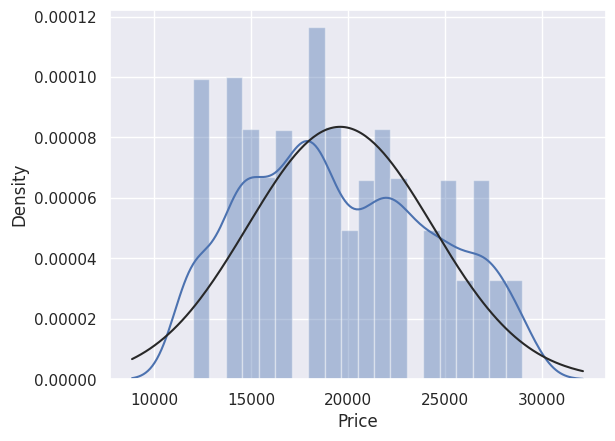

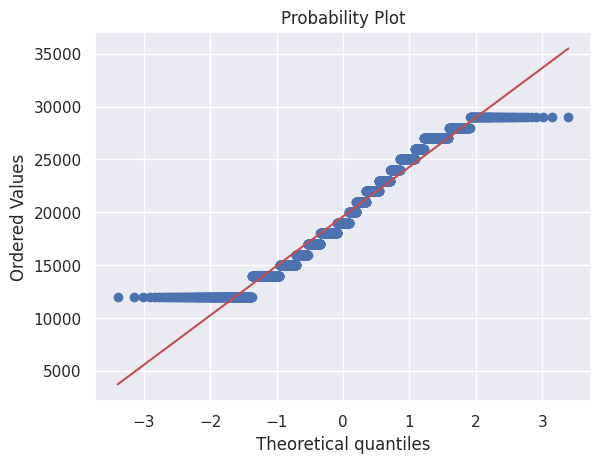

In [367]:
sns.distplot(df['Price'], fit=norm, bins = 20);
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

# Correlation matrix - heatmap style

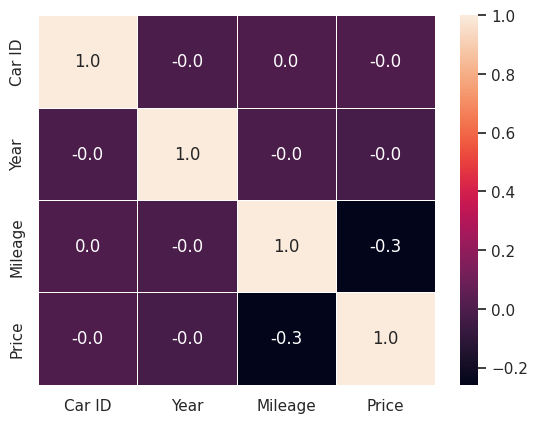

In [368]:
#df = df.drop(columns=['Car ID'])
correlacao = df.corr()
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot
plt.show()

# Scatter plots between 'Price' and correlated variables

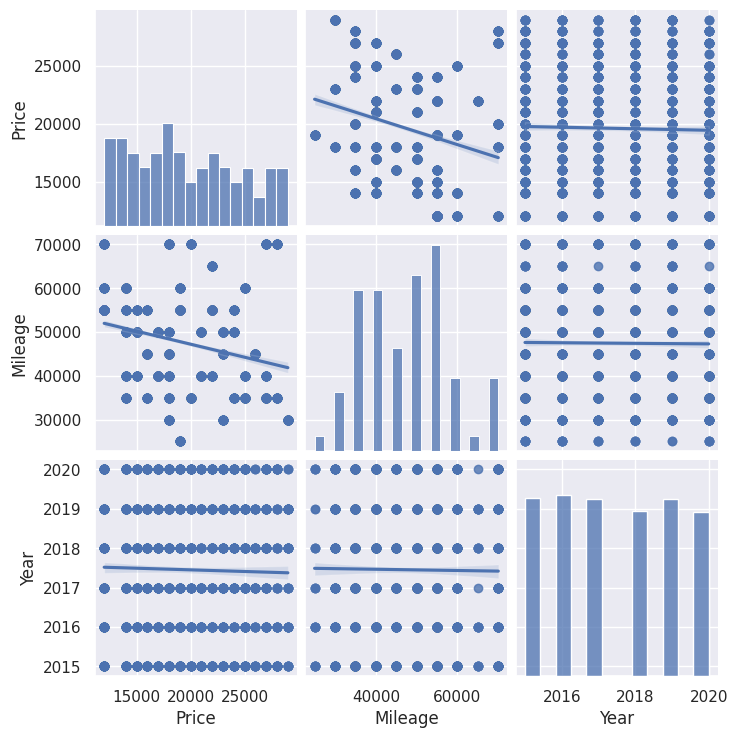

In [369]:
sns.set()
cols = ['Price', 'Mileage', 'Year']
sns.pairplot(df[cols], size = 2.5, kind = "reg")
plt.show();

# Relationship with categorical features

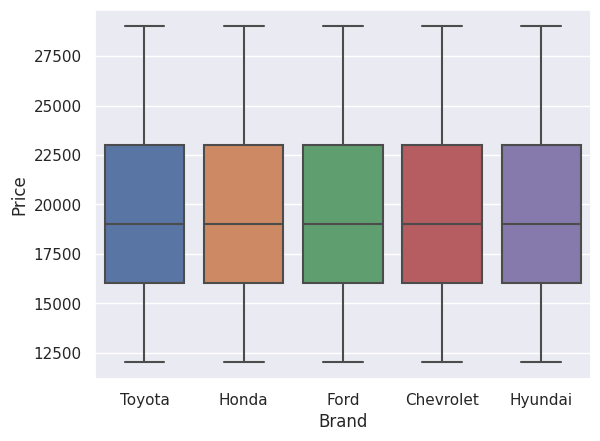

In [370]:
sns.boxplot(data=df, x = 'Brand', y='Price')
plt.show()

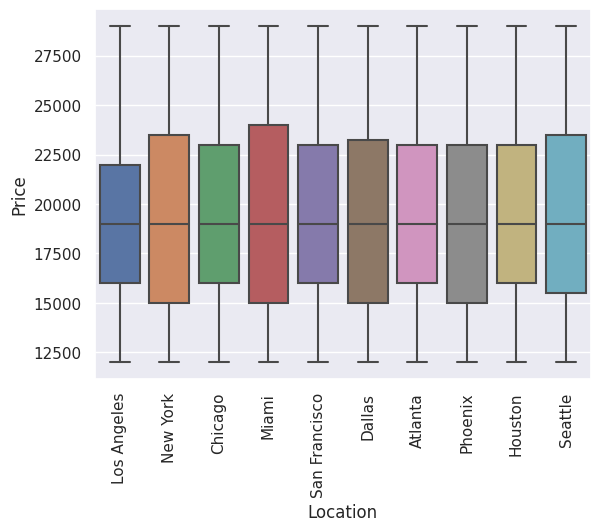

In [371]:
sns.boxplot(data=df, x = 'Location', y='Price')
plt.xticks(rotation='vertical')
plt.show()

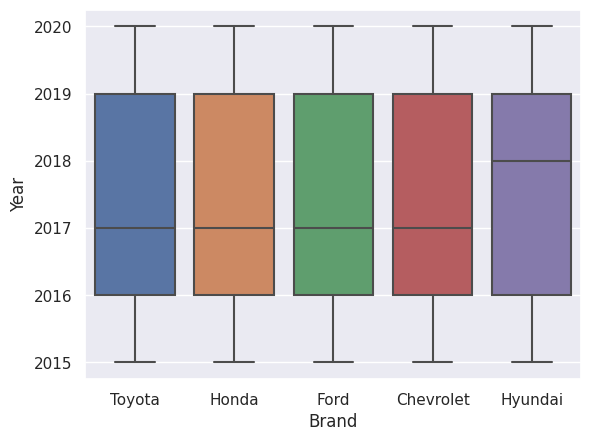

In [372]:
sns.boxplot(data=df, x="Brand", y="Year")
plt.show()

<Axes: xlabel='Color', ylabel='Price'>

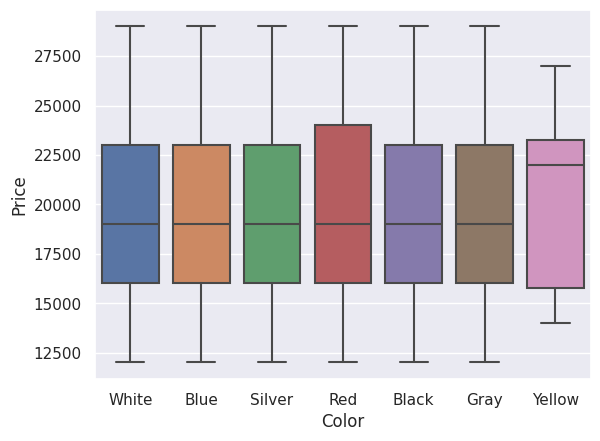

In [373]:
sns.boxplot(data=df, x="Color", y="Price")

# Univariate analysis

In [374]:
def autolabel_vertical(rects):
    """Function to add a label with the value in each bar"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

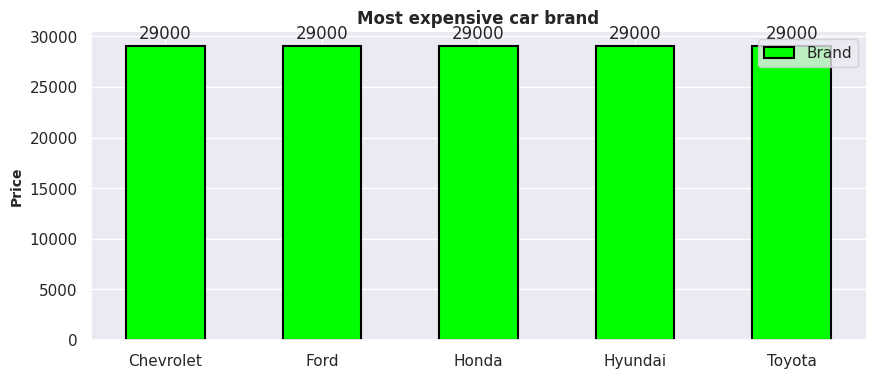

In [375]:
brand_price = df.groupby('Brand')['Price'].max().to_frame()
brand_price = brand_price.sort_values('Price', ascending=False)
fig,ax = plt.subplots(figsize=(10,4))
width = 0.5
rects1 = ax.bar(brand_price.index, brand_price.Price, width = width, linewidth=1.5, edgecolor='black', label = 'Brand', color='lime')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='best')
ax.set_title('Most expensive car brand', fontsize=12, fontweight='bold')
ax.set_ylabel('Price', fontsize=10, fontweight='bold')
autolabel_vertical(rects1)
fig.show()

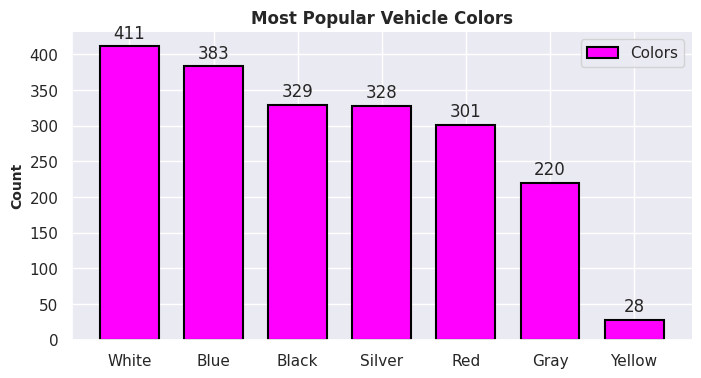

In [376]:
color_count = df['Color'].value_counts().to_frame()
fig,ax = plt.subplots(figsize=(8,4))
width = 0.7
rects1 = ax.bar(color_count.index, color_count.Color, width = width, linewidth=1.5, edgecolor='black', label = 'Colors', color='#FF00FF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='best')
ax.set_title('Most Popular Vehicle Colors', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=10, fontweight='bold')
autolabel_vertical(rects1)
fig.show()

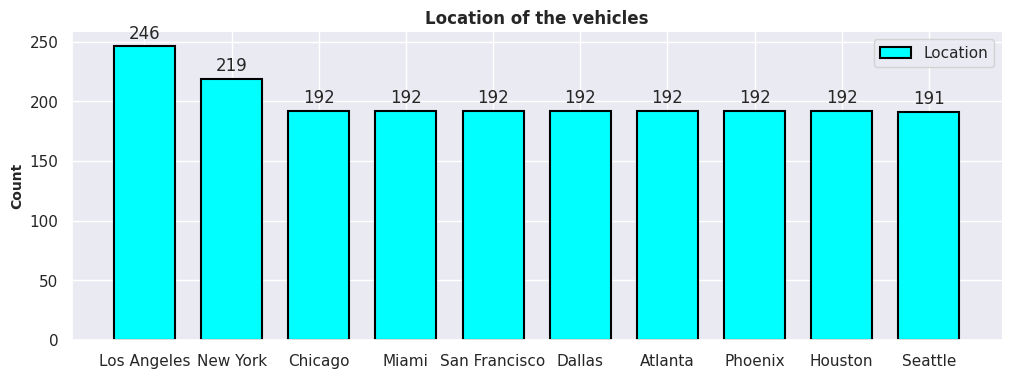

In [377]:
location_count = df['Location'].value_counts().to_frame()
fig,ax = plt.subplots(figsize=(12,4))
width = 0.7
rects1 = ax.bar(location_count.index, location_count.Location, width = width, linewidth=1.5, edgecolor='black', label = 'Location', color='#00FFFF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='best')
ax.set_title('Location of the vehicles', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=10, fontweight='bold')
autolabel_vertical(rects1)
fig.show()

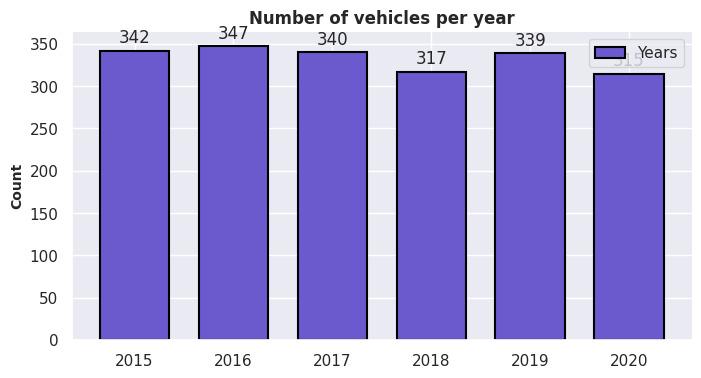

In [378]:
year_count = df['Year'].value_counts().to_frame()
fig,ax = plt.subplots(figsize=(8,4))
width = 0.7
rects1 = ax.bar(year_count.index, year_count.Year, width = width, linewidth=1.5, edgecolor='black', label = 'Years', color='#6A5ACD')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='best')
ax.set_title('Number of vehicles per year', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=10, fontweight='bold')
autolabel_vertical(rects1)
fig.show()

In [379]:
def autolabel_horizontal(rects):
  """Function to add a label with the value in each bar"""
  for rect in rects:
      width = rect.get_width()
      height = rect.get_height()
      ax.annotate('{}'.format(width),
                  xy=(width, rect.get_y() + rect.get_height() / 2),
                  xytext=(3,0),
                  textcoords="offset points",
                  ha='left', va='center', size = 6, weight = 'bold')

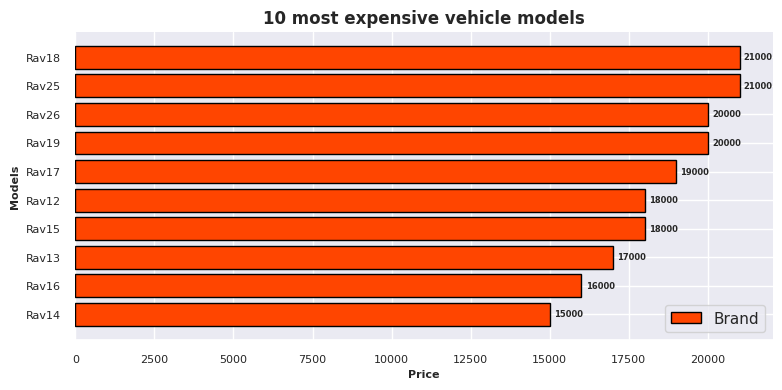

In [380]:
model_price = df.groupby('Model')['Price'].max().to_frame()
model_price = model_price.sort_values('Price',ascending= True)
model_price = model_price.head(10)
fig,ax = plt.subplots(figsize=(9,4))
rects1 = ax.barh(model_price.index, model_price.Price, linewidth=1., edgecolor='black', label = 'Brand', color='#FF4500')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend(loc='best')
ax.set_title('10 most expensive vehicle models', fontsize=12, fontweight='bold')
ax.set_xlabel('Price', fontsize=8, fontweight='bold')
ax.set_ylabel('Models', fontsize=8, fontweight='bold')
ax.tick_params(labelsize=8, size=7)
autolabel_horizontal(rects1)
fig.show()

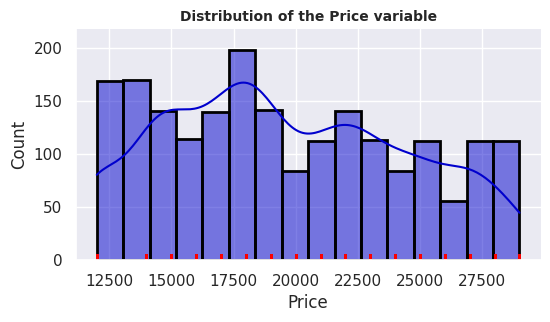

In [381]:
fig,ax = plt.subplots(figsize=(6,3))
sns.histplot(df, x = 'Price', kde=True, linewidth = 2.0, edgecolor = 'black', color = '#0000CD', ax = ax)
sns.rugplot(df, x = 'Price', color = 'red', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Distribution of the Price variable',fontsize=10,fontweight='bold')
fig.show()

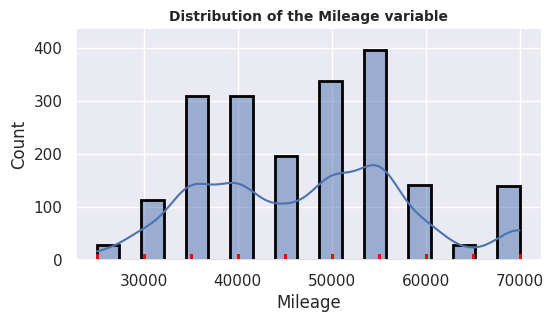

In [382]:
fig,ax = plt.subplots(figsize=(6,3))
sns.histplot(df, x = 'Mileage', kde=True, linewidth = 2.0, edgecolor = 'black', ax = ax)
sns.rugplot(df, x = 'Mileage', color = 'red', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Distribution of the Mileage variable',fontsize=10,fontweight='bold')
fig.show()

# Bivariate analysis

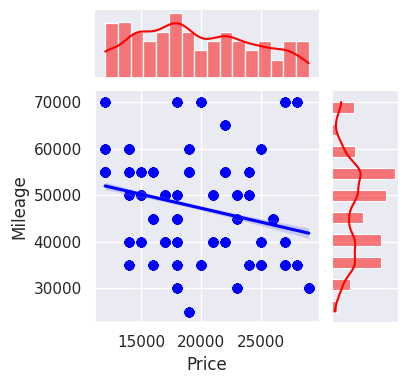

In [383]:
sns.jointplot(df, x = 'Price', y = 'Mileage',
              joint_kws={'color':'blue'},
              marginal_kws={'color':'red'}, kind = 'reg',
              height = 4,
              ratio = 3)

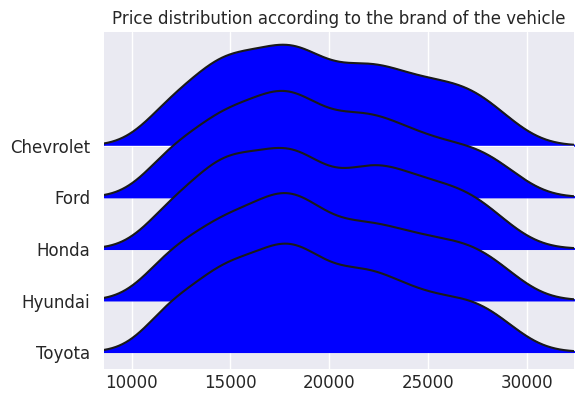

In [384]:
joyplot(df[['Price','Brand']],column='Price', by = 'Brand', color = 'blue', grid = True, figsize=(6,4))
plt.title('Price distribution according to the brand of the vehicle')
fig.show()

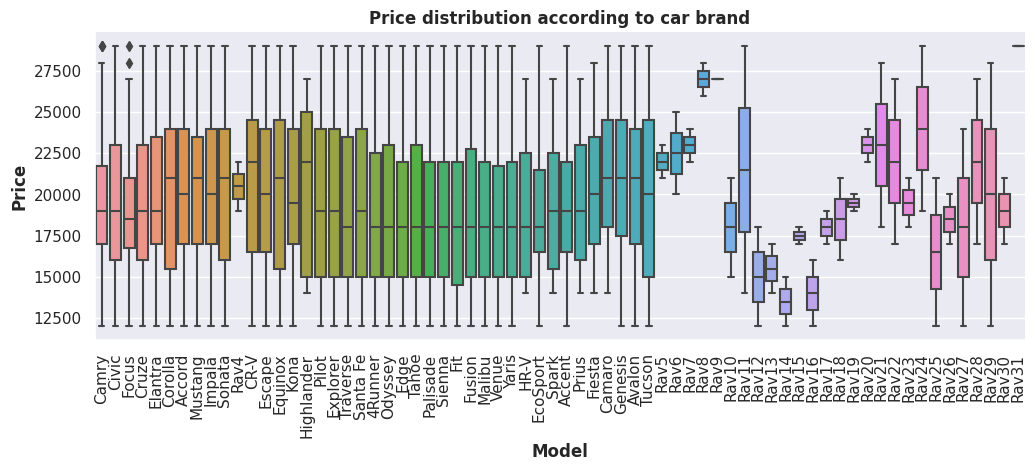

In [385]:
fig,ax = plt.subplots(figsize=(12,4))
rect1 = sns.boxplot(df, x = 'Model', y = 'Price',ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x',rotation=90)
ax.set_title('Price distribution according to car brand',fontsize=12, fontweight='bold')
ax.set_xlabel('Model',fontweight='bold')
ax.set_ylabel('Price',fontweight='bold')
fig.show()

# Preprocessing

In [386]:
df_new = df.copy()



In [387]:
numerical_cols = df_new.select_dtypes(include=['float']).columns.to_list()
categorical_cols = df_new.select_dtypes(include=['category']).columns.to_list()

print(f'Numerical features: {numerical_cols}')
print(f'Categorical features: {categorical_cols}')

Numerical features: []
Categorical features: []


In [388]:
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),
                                  ('scaler', MinMaxScaler(),numerical_cols)],
                                 remainder = 'passthrough', verbose_feature_names_out = False).set_output(transform='pandas')
df_new_prep = preprocessor.fit_transform(df_new)
print(f'Data set size: {df_new_prep.shape}')

Data set size: (2000, 8)


# Dimensionality reduction

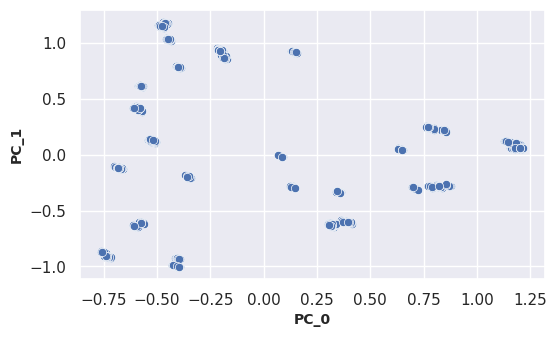

In [389]:
fig,ax = plt.subplots(figsize = (6,3.5))
sns.scatterplot(df_pca, x = 'PC_0', y = 'PC_1', ax =ax)
ax.set_xlabel('PC_0',fontsize = 10, fontweight = 'bold')
ax.set_ylabel('PC_1',fontsize = 10, fontweight = 'bold')
fig.show()

# Clustering

For n_clusters = 2 The average silhouette_score is : 0.3533694272861995
For n_clusters = 3 The average silhouette_score is : 0.6037160113265816
For n_clusters = 4 The average silhouette_score is : 0.6178447589441339
For n_clusters = 5 The average silhouette_score is : 0.6352516351866195


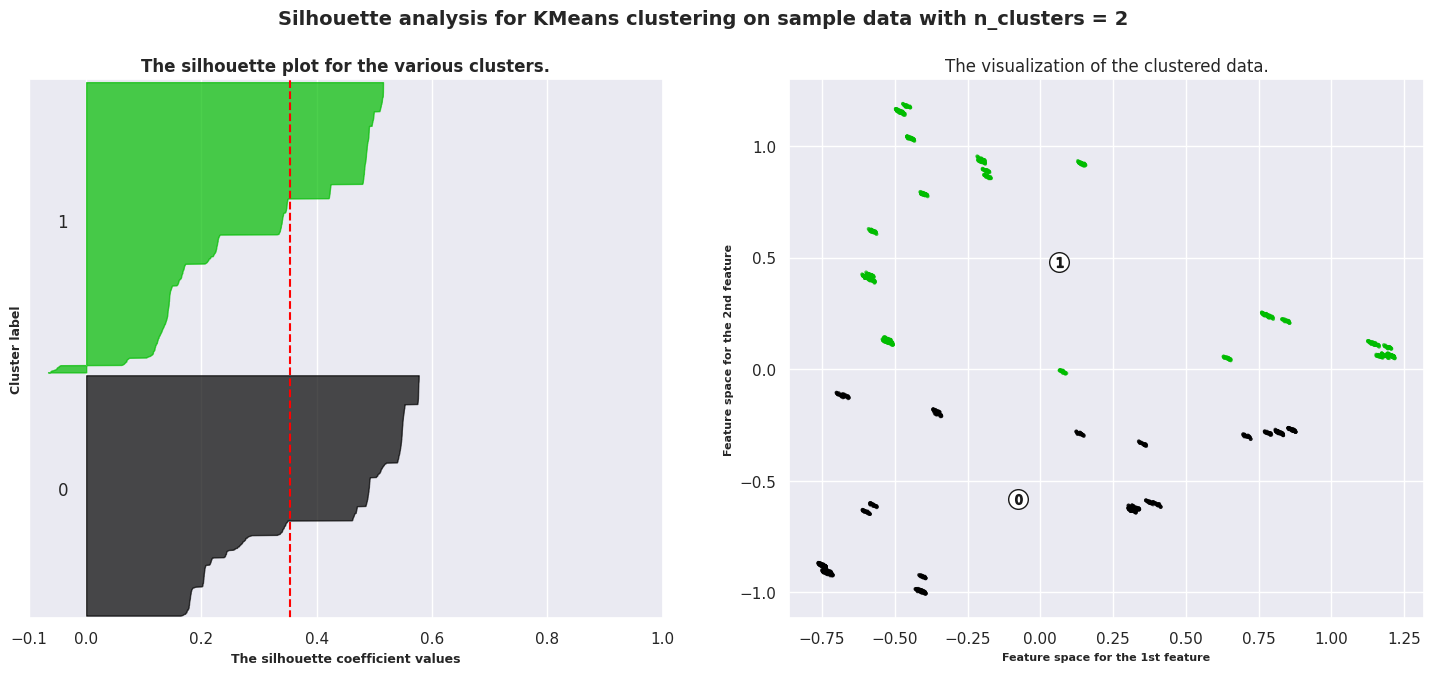

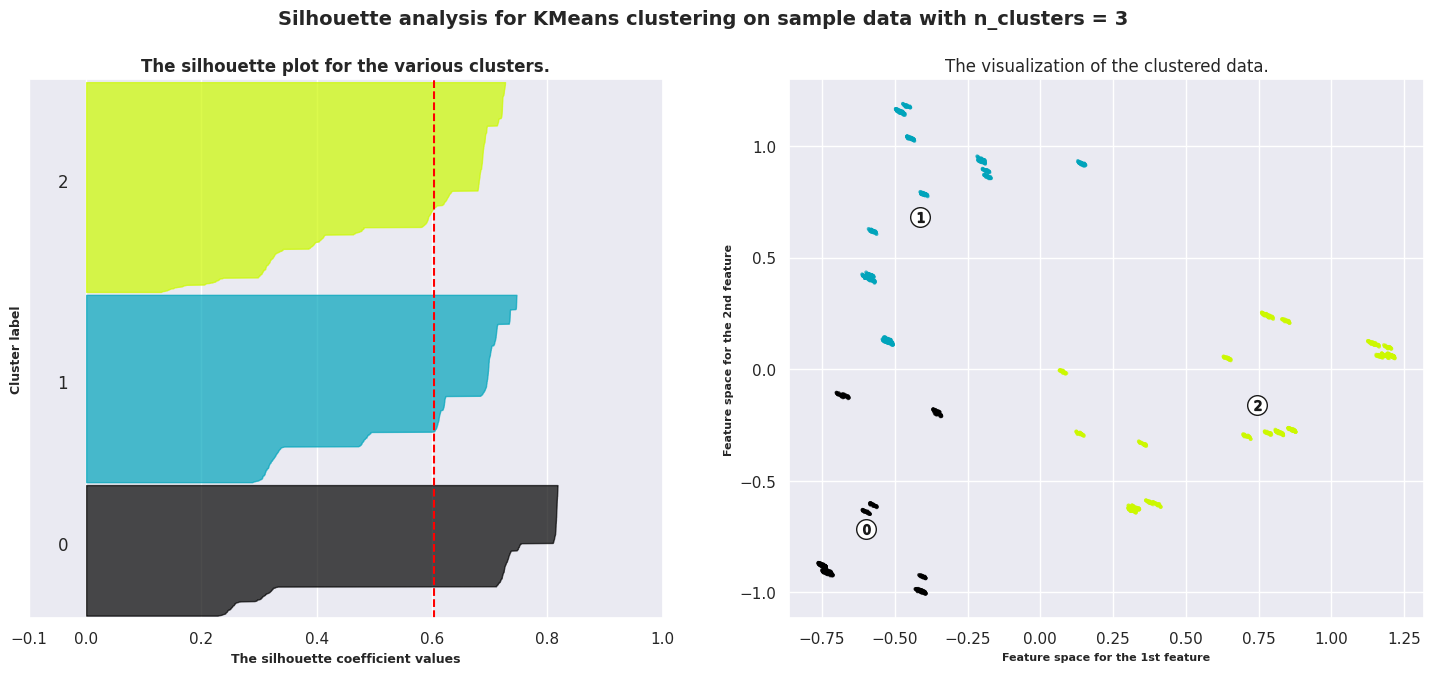

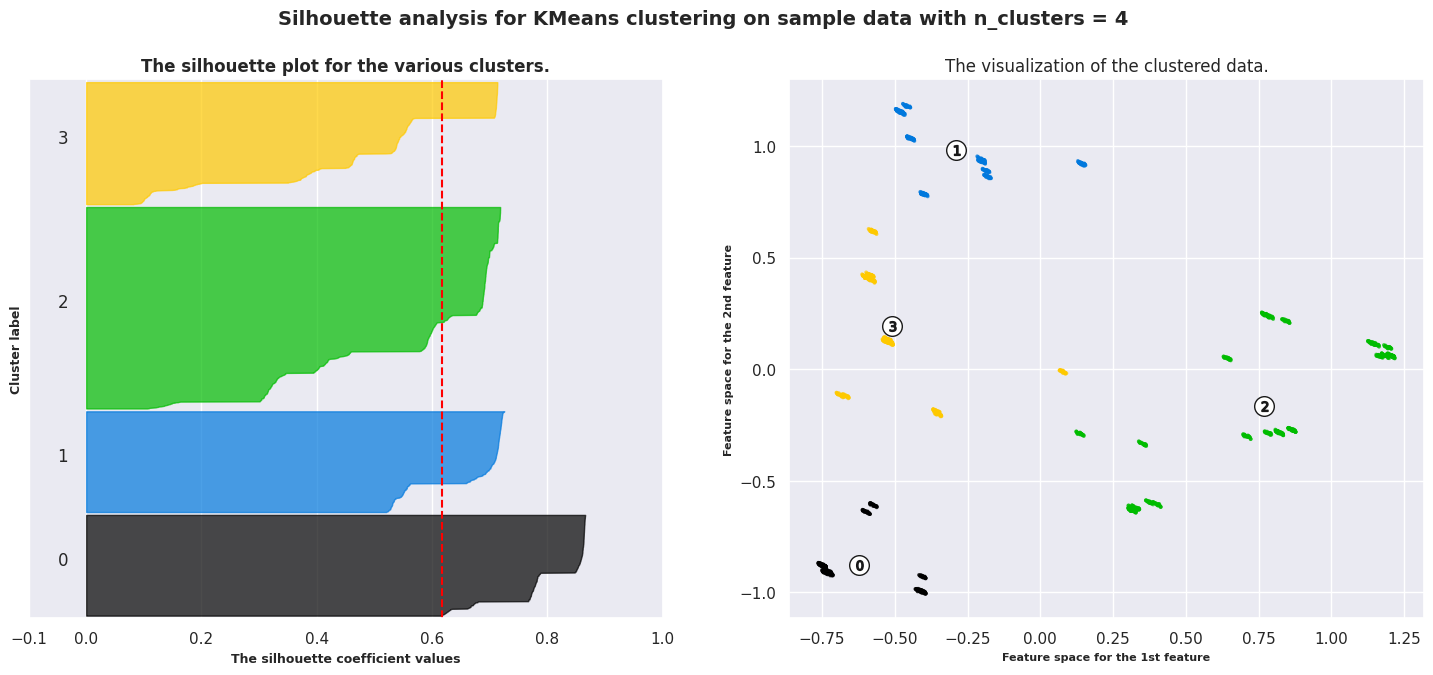

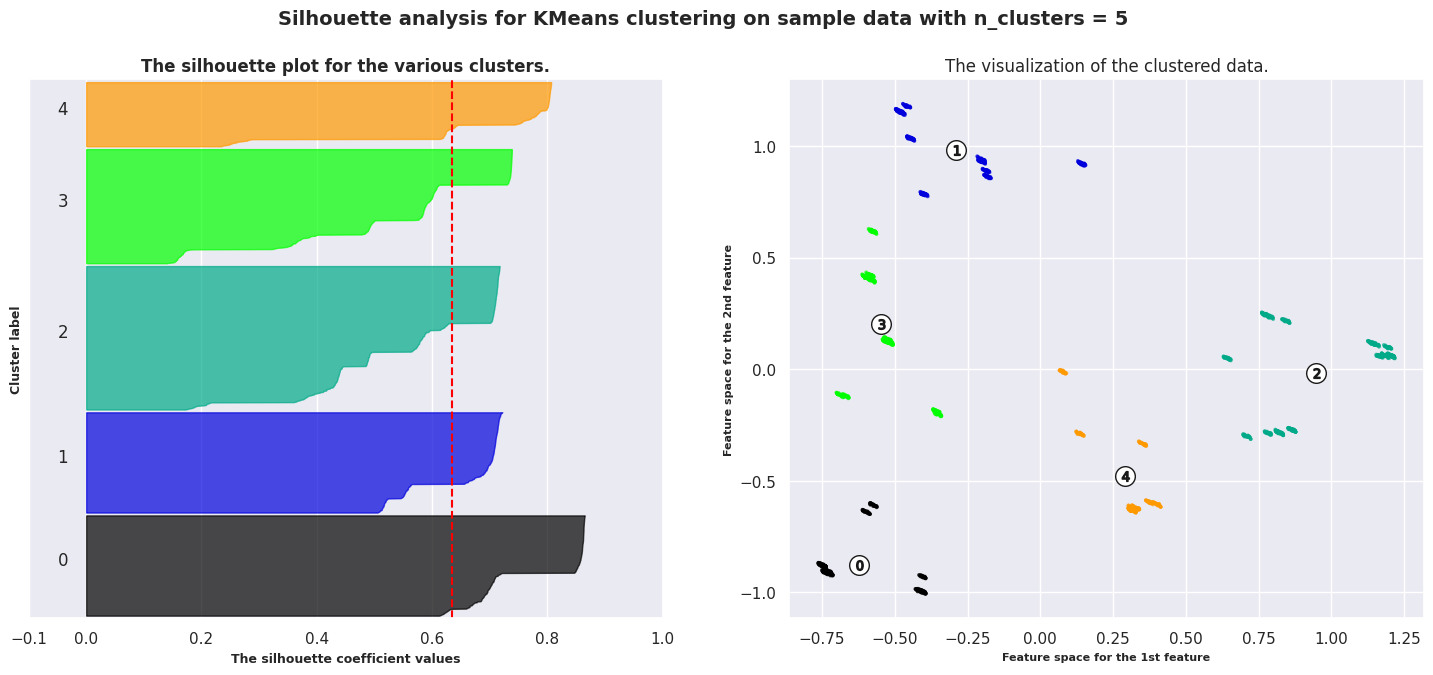

In [390]:
## Clustering

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(
        "For n_clusters =",n_clusters,
        "The average silhouette_score is :",silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.", fontsize = 12, fontweight = 'bold')
    ax1.set_xlabel("The silhouette coefficient values", fontsize = 9, fontweight = 'bold')
    ax1.set_ylabel("Cluster label", fontsize = 9, fontweight = 'bold')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_pca.iloc[:, 0], df_pca.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature", fontsize = 8, fontweight = 'bold')
    ax2.set_ylabel("Feature space for the 2nd feature", fontsize = 8, fontweight = 'bold')

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Data Transformation

In [391]:
main_label = 'Price'
# log10-transform distance and group for larger bins
df['log10_Mileage'] = df['Mileage'].apply(lambda x: 1/10*round(10*np.log10(1+x)))
# set up the rare label encoder limiting number of categories to max_n_categories
for col in ['Brand', 'Color', 'Location']:
    encoder = RareLabelEncoder(n_categories=1, max_n_categories=20, replace_with='Other', tol=6/df.shape[0])
    df[col] = encoder.fit_transform(df[[col]])
# drop unused columns
cols2drop = ['Mileage', 'Model']
df = df.drop(cols2drop, axis=1)
print(df.shape)
df.sample(5).T

(2000, 7)


,462,840,748,1707,237
Car ID,463,841,749,1708,238
Brand,Hyundai,Ford,Chevrolet,Chevrolet,Chevrolet
Year,2020,2016,2020,2017,2018
Color,Silver,Blue,Black,Blue,Black
Price,17000,25000,16000,12000,29000
Location,San Francisco,Phoenix,Houston,Houston,Houston
log10_Mileage,4.7,4.5,4.7,4.8,4.5


# Machine learning

In [392]:
# initialize data
y = df[main_label].values.reshape(-1,)
X = df.drop([main_label], axis=1)
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols_idx = [list(X.columns).index(c) for c in cat_cols]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1000, 6), (1000, 6), (1000,), (1000,))

In [393]:
# initialize Pool
train_pool = Pool(X_train,
                  y_train,
                  cat_features=cat_cols_idx)
test_pool = Pool(X_test,
                 y_test,
                 cat_features=cat_cols_idx)
# specify the training parameters
model = CatBoostRegressor(iterations=300,
                          depth=5,
                          verbose=0,
                          learning_rate=0.01,
                          loss_function='RMSE')
# train the model
model.fit(train_pool)
# make the prediction using the resulting model
y_train_pred = model.predict(train_pool)
y_test_pred = model.predict(test_pool)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"RMSE score for train {round(rmse_train)}, and for test {round(rmse_test)}")


RMSE score for train 4456, and for test 4482


In [394]:
# Baseline scores (assuming the same prediction for all data samples)
rmse_bs_train = mean_squared_error(y_train, [np.mean(y_train)]*len(y_train), squared=False)
rmse_bs_test = mean_squared_error(y_test, [np.mean(y_train)]*len(y_test), squared=False)
print(f"RMSE baseline score for train {round(rmse_bs_train)}, and for test {round(rmse_bs_test)}")

RMSE baseline score for train 4843, and for test 4709


# Explanations with SHAP values

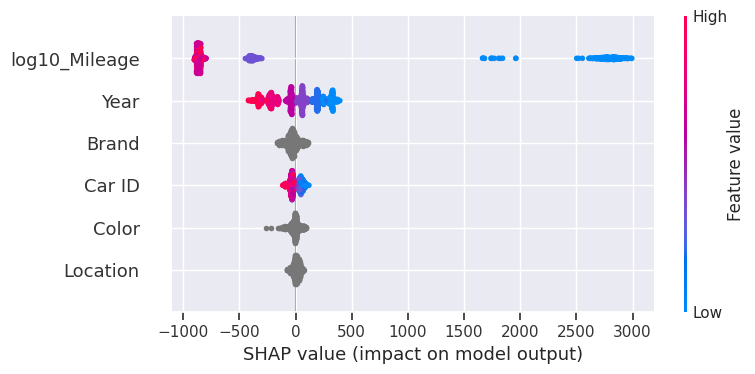

In [395]:
shap.initjs()
ex = shap.TreeExplainer(model)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [396]:
expected_values = ex.expected_value
print(f"Average predicted price is {round(expected_values)}")
print(f"Average actual price is {round(np.mean(y_test))}")

Average predicted price is 19627
Average actual price is 19580
